<a href="https://colab.research.google.com/github/Agentum07/tomatinator/blob/main/Sentiment_Analysis_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# test comment, can you see this Nigel? yep hi do u see me
# I don't think we need to have a subjectivity column, since that doesn't have anything to do with sentiment 
# yea i guess its just polarity that matters, im not sure why they even use subjectivity

# on second thought it might help with fake news analysis i'm not sure

In [ ]:
import tweepy
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import nltk

In [ ]:
flag = True
lines2 = []
while flag:
  val = input("Enter the text: ")
  lines2.append(val)
  ans = input("do u want to enter another tweet y/n? ")
  flag = ans == 'y'


Enter the text: i had an amazing day because his sucked lol
do u want to enter another tweet y/n? n


In [ ]:
#Create a dataframe with coloumn called tweet
print(lines2)
df = pd.DataFrame({'Tweets' : lines2})

df.head()

['i had an amazing day because his sucked lol']


,Tweets
0,i had an amazing day because his sucked lol


In [ ]:
#Clean the text
def cleanText(text):
  text = re.sub(r'@[A-za-z0-9]+' , '', text) #Remove mentions
  text = re.sub(r'RT[\s]+', '', text) #remove retweets
  text = re.sub(r'https?:\/\/\S+', '', text) #remove hyperlinks

  return text 

#Clean the text
df['Tweets'] = df['Tweets'].apply(cleanText)

#Show the cleaned text
df



,Tweets
0,i had an amazing day because his sucked lol


In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 

#Create a function to get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
  

#Create new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df


,Tweets,Subjectivity,Polarity
0,i had an amazing day because his sucked lol,0.8,0.7


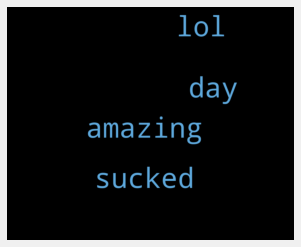

In [ ]:
#Plot wordcloud
allWords = ' '.join([twts for twts in df['Tweets']])
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110, mask = Mask).generate(allWords)

plt.imshow(wordCloud.recolor(color_func=image_colors), interpolation =  "hamming")

plt.axis('off')
plt.show()


In [ ]:
#Create a fn to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < - 0.2:
    return 'Negative'
  elif score > 0.2:
    return 'Positive'
  else: 
    return 'Neutral'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,i had an amazing day because his sucked lol,0.8,0.7,Positive


In [ ]:
# function to get all the hashtags
# this will hep us classify the tweets
def Hashtags_Extract(x):
    hashtags=[]
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    return hashtags


ht_positive = Hashtags_Extract(df['Tweets'][df['Analysis'] == 'Positive'])
ht_negative = Hashtags_Extract(df['Tweets'][df['Analysis'] == 'Negative'])
ht_neutral = Hashtags_Extract(df['Tweets'][df['Analysis'] == 'Neutral'])

ht_positive_unnest = sum(ht_positive,[])
ht_negative_unnest = sum(ht_negative,[])
ht_neutral_unnest = sum(ht_neutral,[])

ht_neutral_unnest

[]

In [ ]:

# counting the frequency of positive hashtags

word_freq_positive = nltk.FreqDist(ht_positive_unnest)
word_freq_negative = nltk.FreqDist(ht_negative_unnest)
word_freq_neutral = nltk.FreqDist(ht_neutral_unnest)

# creating a dataframe for the most frequently used words in hashtags
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})
df_neutral = pd.DataFrame({'Hashtags':list(word_freq_neutral.keys()),'Count':list(word_freq_neutral.values())})

def show_plot(sentiment, num_of_tags=1):
  if sentiment == 'Positive':
    df_positive_plot = df_positive.nlargest(num_of_tags, columns='Count')
    sns.barplot(data=df_positive_plot,y='Hashtags', x='Count')
    sns.despine()
    plt.show()

  elif sentiment == 'Negative':
    df_negative_plot = df_negative.nlargest(num_of_tags,columns='Count') 
    sns.barplot(data=df_negative_plot,y='Hashtags', x='Count')
    sns.despine()
    plt.show()

  else:
    df_neutral_plot = df_neutral.nlargest(num_of_tags,columns='Count') 
    sns.barplot(data=df_neutral,y='Hashtags', x='Count')
    sns.despine()
    plt.show()

In [ ]:
# print all statements in increasing order of positivity
def printHistory(asc, num = 1):
  j = 1
  sortedDF = df.sort_values(by = ['Polarity'], axis=0, ascending = asc)
  sortedDF = sortedDF.reset_index(drop=True)
  sortedDF = sortedDF[['Tweets', 'Analysis']].iloc[:num]
  print(sortedDF)
  
  # for tweet in sortedDF[['Tweets', 'Analysis']]:
  #   if (j > num):
  #     print("breaking out")
  #     break
  #   print(str(j) + '. ' + sortedDF['Tweets'][j - 1] + " " + sortedDF['Analysis'][j - 1])
  #   print()
  #   j = j + 1
  

  # for tweet in sortedDF['Tweets']:
  #   if (j > num):
  #     print("breaking out")
  #     break
  #   print(str(j) + '. ' + tweet + " " + sortedDF['Analysis'][j - 1])
  #   print()
  #   j = j + 1

printHistory(False, 2)

                                  Tweets Analysis
0  he had a terrible day, and I am glad!  Neutral


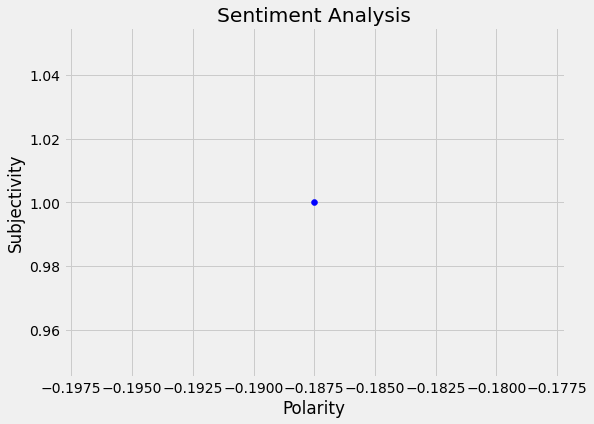

In [ ]:
# Plot the polarity and subjectivity
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of different types of tweets
sentiments = ['Positive', 'Neutral', 'Negative']
for sentiment in sentiments:
  postweets = df[df.Analysis == sentiment]
  postweets = postweets['Tweets']
  print(sentiment + " tweets: " + str(round( (postweets.shape[0] / df.shape[0]) * 100 , 1)))

Positive tweets: 0.0
Neutral tweets: 100.0
Negative tweets: 0.0


In [ ]:
# hashtag charts